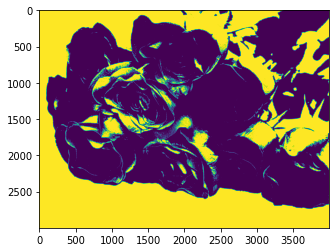

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('rose.png', 0)

thresh_value = 127 
max_value = 1
_, binary_img = cv2.threshold(img, thresh_value, max_value, cv2.THRESH_BINARY)

plt.imshow(binary_img)


def bit_rle(binary_img):
    rle = []

    for row in binary_img:
        count = 0
        prev_val = row[0]
        row_rle = []

        for pixel in row:
            if pixel == prev_val:
                count += 1
            else:
                row_rle.append((count))
                row_rle.append(prev_val)
                prev_val = pixel
                count = 1

        row_rle.append((count))
        row_rle.append(prev_val)

        rle.append(row_rle)

    return rle


rle_data = bit_rle(binary_img)

# print(rle_data[:5])
with open("file.txt", 'w') as output:
    for row in rle_data:
        output.write(str(row)+'\n')

# from PIL import Image
# img = rle_data.save('savedimage.png')
 
# for row_rle in rle_data:
#     print(row_rle)
